# Naive Baseline Models + Additional Metrics
* all zeroes
* all ones
* most common set of genres
* per-genre accuracy

In [6]:
import os
import pickle

import numpy as np
import pandas as pd
import sklearn.metrics as skmetrics
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
out = open('data/cols.pkl', 'r')
cols = pickle.load(out)
y_pred = pd.DataFrame(np.load('data/y_pred.npy'), columns = cols)
y_test = pd.DataFrame(np.load('data/y_test.npy'), columns = cols)

## Neural Net Output

In [8]:
print 'hamming loss:', skmetrics.hamming_loss(y_test, y_pred)
print 'jaccard similarity:', skmetrics.jaccard_similarity_score(y_test, y_pred)
print 'zero one loss:', skmetrics.zero_one_loss(y_test, y_pred)
print 'exact match ratio:', skmetrics.accuracy_score(y_test, y_pred)

hamming loss: 0.133620689655
jaccard similarity: 0.159736247947
zero one loss: 0.969827586207
exact match ratio: 0.0301724137931


## All Zeros

In [9]:
zeros = np.zeros(y_test.shape)
print 'hamming loss:', skmetrics.hamming_loss(y_test, zeros)
print 'jaccard similarity:', skmetrics.jaccard_similarity_score(y_test, zeros)
print 'zero one loss:', skmetrics.zero_one_loss(y_test, zeros)
print 'exact match ratio:', skmetrics.accuracy_score(y_test, zeros)

hamming loss: 0.138520871143
jaccard similarity: 0.0
zero one loss: 1.0
exact match ratio: 0.0


## All Ones

In [10]:
ones = np.ones(y_test.shape)
print 'hamming loss:', skmetrics.hamming_loss(y_test, ones)
print 'jaccard similarity:', skmetrics.jaccard_similarity_score(y_test, ones)
print 'zero one loss:', skmetrics.zero_one_loss(y_test, ones)
print 'exact match ratio:', skmetrics.accuracy_score(y_test, ones)

hamming loss: 0.861479128857
jaccard similarity: 0.138520871143
zero one loss: 1.0
exact match ratio: 0.0


## Most Common Set of Genres

In [11]:
count = Counter()
for index, row in y_test.iterrows():
    count[tuple(row)] += 1
print "most common combo:", count.most_common(1)[0][0]
print "appears {} times".format(count.most_common(1)[0][1])

most common combo: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0)
appears 72 times


In [12]:
most_common = pd.Series(count.most_common(1)[0][0]).to_frame().T
most_common.columns = cols
naive = pd.concat([most_common] * len(y_test))

In [13]:
naive.head()

,War,Mystery,Music,Comedy,History,Western,Animation,Adventure,Drama,Fantasy,Crime,TV Movie,Documentary,Thriller,Science Fiction,Horror,Action,Romance,Family
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [14]:
print 'hamming loss:', skmetrics.hamming_loss(y_test, naive)
print 'jaccard similarity:', skmetrics.jaccard_similarity_score(y_test, naive)
print 'zero one loss:', skmetrics.zero_one_loss(y_test, naive)
print 'exact match ratio:', skmetrics.accuracy_score(y_test, naive)

hamming loss: 0.179809437387
jaccard similarity: 0.0827586206897
zero one loss: 0.937931034483
exact match ratio: 0.0620689655172


## Per Genre Accuracy

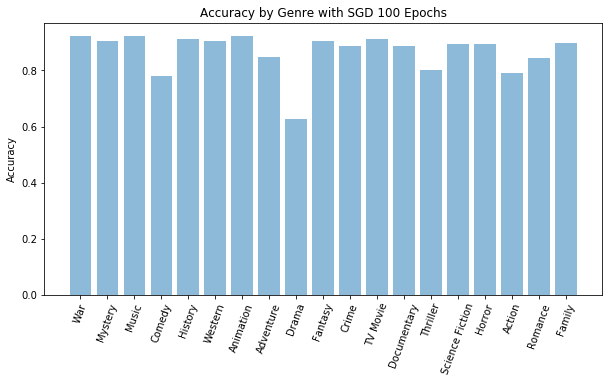

In [27]:
genre_acc = []
for genre in cols:
    genre_acc.append((y_test[genre] == y_pred[genre]).mean())
# pd.DataFrame(genre_acc, index = [0]).plot.bar(
#     figsize = (10,10)
# )

plt.figure(figsize=(10, 5))
y_pos = np.arange(len(cols))
plt.bar(y_pos, genre_acc, align='center', alpha=0.5)
plt.xticks(y_pos, cols)
plt.xticks(rotation=70)
plt.ylabel('Accuracy')
plt.title('Accuracy by Genre with SGD 100 Epochs')
plt.show()